## Collecting the Data 

In [1]:
import pandas as pd

df_train = pd.read_csv('../data/train_data_stg.csv', delimiter='|')

df_test = pd.read_csv('../data/test_data_stg.csv', delimiter='|')

In [2]:
df_train.head()

,rank,t,p
0,1,11662839.55,7622.0
1,2,1931166.67,1164.0
2,3,78411667.44,432896.0
3,4,2274540.32,10046.0
4,5,2113766.13,1962.0


In [3]:
df_test.head()

,rank,t,p
0,25,32625522.00,25408.0
1,30,9678145.70,68264.0
2,53,3453252.19,3437.0
3,65,2727246.97,12729.0
4,66,1161085.64,2417.0


In [4]:
df_train = df_train.drop(['rank'], axis=1)


df_test = df_test.drop(['rank'], axis=1)


In [5]:
df_train.head()

,t,p
0,11662839.55,7622.0
1,1931166.67,1164.0
2,78411667.44,432896.0
3,2274540.32,10046.0
4,2113766.13,1962.0


In [6]:
df_test.head()

,t,p
0,32625522.00,25408.0
1,9678145.70,68264.0
2,3453252.19,3437.0
3,2727246.97,12729.0
4,1161085.64,2417.0


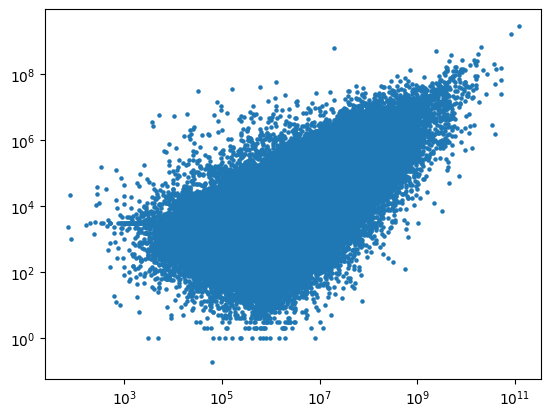

In [7]:
import matplotlib.pyplot as plt 

plt.scatter(df_train['t'], df_train['p'], s=5)
plt.xscale('log')
plt.yscale('log')
plt.show()

In [8]:
import numpy as np
df_train['t'] = np.log(df_train['t'])
df_train['p'] = np.log(df_train['p'])

df_test['t'] = np.log(df_test['t'])
df_test['p'] = np.log(df_test['p'])

In [9]:
from sklearn.compose import TransformedTargetRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

model = TransformedTargetRegressor(LinearRegression(), transformer=StandardScaler())
model.fit(df_train[['t']], df_train[['p']])

predictions = model.predict(df_test[['t']])

In [10]:
from sklearn.metrics import mean_absolute_error, r2_score, root_mean_squared_error

print("Mean Absolute Error (MAE): %.2f" % mean_absolute_error(df_test[['p']], predictions))
print("Root Mean Squarred Error (RMSE): %.2f" % root_mean_squared_error(df_test[['p']], predictions))
print("R2 Score %.2f" % r2_score(df_test[['p']], predictions))

Mean Absolute Error (MAE): 1.23
Root Mean Squarred Error (RMSE): 1.58
R2 Score 0.38


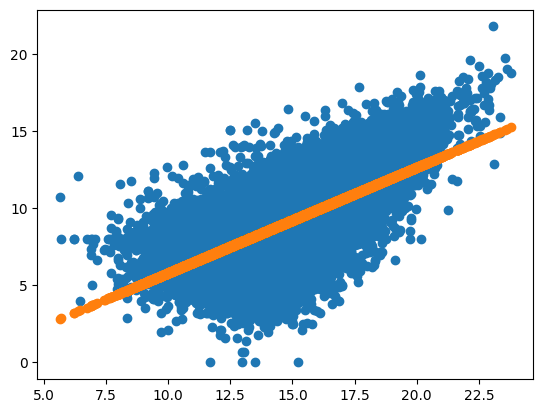

In [11]:
import matplotlib.pyplot as plt

plt.scatter(df_test['t'], df_test['p'])
plt.scatter(df_test['t'], predictions)
plt.show()